# Star dataset to predict star types
A 6 class star dataset for star classification with Deep Learned approaches

https://www.kaggle.com/datasets/deepu1109/star-dataset

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'/content'

In [19]:
os.chdir('/gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis')
working_dir = os.getcwd()

In [5]:
stars = pd.read_csv('6 class csv.csv')
stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [6]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [7]:
stars = (stars
         .rename(columns ={'Star type':'star_type',
                           'Star color':'star_color',
                           'Spectral Class':'spectral_class'
                           }
                 )
         .assign(star_color = lambda df_:df_['star_color'].astype('category'),
                 spectral_class = lambda df_:df_['spectral_class'].astype('category')
                 )
         )
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Temperature (K)         240 non-null    int64   
 1   Luminosity(L/Lo)        240 non-null    float64 
 2   Radius(R/Ro)            240 non-null    float64 
 3   Absolute magnitude(Mv)  240 non-null    float64 
 4   star_type               240 non-null    int64   
 5   star_color              240 non-null    category
 6   spectral_class          240 non-null    category
dtypes: category(2), float64(3), int64(2)
memory usage: 11.0 KB


# Folder to store different plots

In [27]:
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok = True)
base_dir = f"{working_dir}/{folder_name}/"

In [28]:
base_dir

'/gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/'

In [30]:
stars['star_type'].value_counts()

star_type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

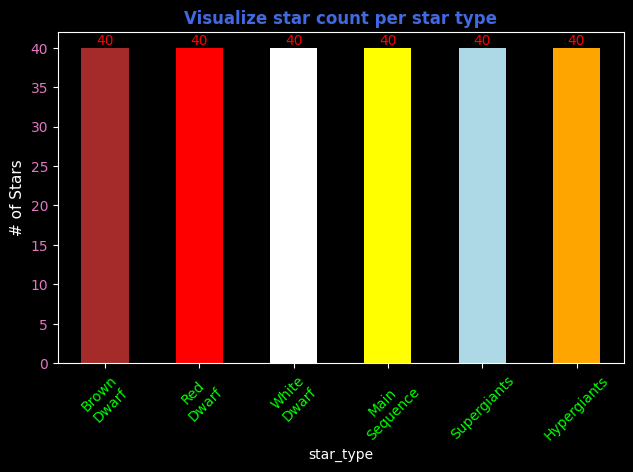

In [34]:
# Customize the plot
plt.figure(figsize=(7.3,4.3))
plt.style.use('dark_background')
ax = stars['star_type'].value_counts().plot(kind='bar', color=['brown', 'red', 'white', 'yellow', 'lightblue', 'orange'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Visualize star count per star type', color='royalblue', weight='bold')
plt.yticks(color='tab:pink')
plt.ylabel('# of Stars', color='white', fontsize=11)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
           rotation=45, color='lime')
plt.savefig(base_dir+'barplot_star_count.png')
plt.show()

In [40]:
stars['star_color'].unique().tolist()
# There is some data cleaning to do

['Red',
 'Blue White',
 'White',
 'Yellowish White',
 'Blue white',
 'Pale yellow orange',
 'Blue',
 'Blue-white',
 'Whitish',
 'yellow-white',
 'Orange',
 'White-Yellow',
 'white',
 'Blue ',
 'yellowish',
 'Yellowish',
 'Orange-Red',
 'Blue white ',
 'Blue-White']

In [41]:
stars['star_color'].value_counts()

star_color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
white                   3
Yellowish White         3
Whitish                 2
yellowish               2
Orange                  2
Blue                    1
White-Yellow            1
Orange-Red              1
Yellowish               1
Blue-White              1
Blue white              1
Pale yellow orange      1
Name: count, dtype: int64

In [42]:
stars = stars.replace({'star_color':{'Blue white':'Blue-White',
                                     'Blue-white':'Blue-White',
                                     'Blue White':'Blue-White',
                                     'Blue white ':'Blue-White',
                                     'Blue ':'Blue',
                                     'yellowish':'Yellowish',
                                     'white':'White'}})
stars['star_color'].value_counts()

star_color
Red                   112
Blue                   56
Blue-White             41
White                  10
yellow-white            8
Yellowish               3
Yellowish White         3
Orange                  2
Whitish                 2
Orange-Red              1
Pale yellow orange      1
White-Yellow            1
Name: count, dtype: int64

<ipython-input-53-c409d11e6a14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=stars['star_color'].value_counts().index,


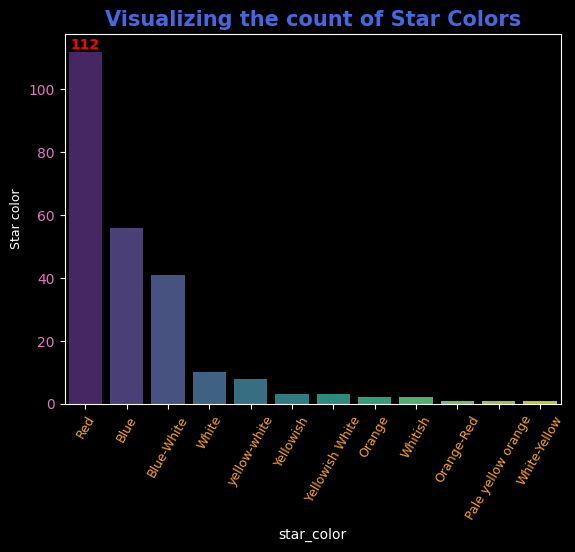

In [53]:
# Visulaising the Star color data
ax = sns.barplot(x=stars['star_color'].value_counts().index,
            y=stars['star_color'].value_counts(),
            palette='viridis',
            order=stars['star_color'].value_counts().index)
ax.bar_label(ax.containers[0], color='red', weight='bold')
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=60, color='orange', fontsize=9)
plt.ylabel('Star color',color='white', fontsize=9)
plt.yticks(color='tab:pink')
plt.savefig(base_dir+'star_colors_viz.png')
plt.show()
#sns.barplot(x='Dim', y='Count', data=pd_df, order=pd_df['Dim'])`

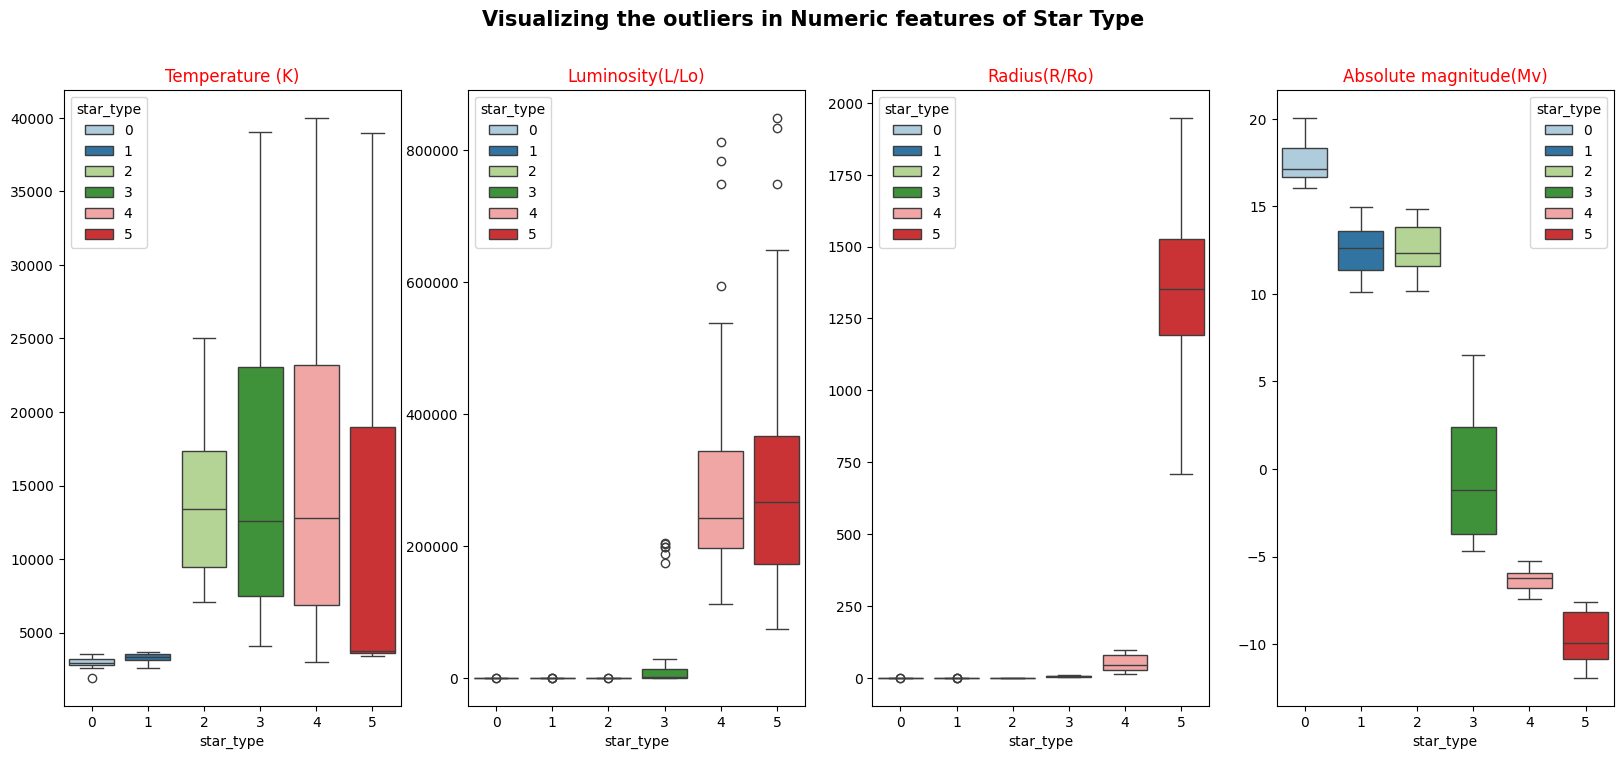

In [61]:
# Visualize Outliers in the Data
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='black', weight='bold', fontsize=15)

# Using for loop to easily repeat some steps to create subplot
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=stars['star_type'], y=stars.iloc[:, i], palette="Paired", hue = stars['star_type'])
  plt.title(stars.columns[i], color='red')
  plt.ylabel('')

# Saving the figure
plt.savefig(base_dir+'boxplot_star_type.png')

In [62]:
def line_subplot(df, colors, i):
  """
  This will create subplot within for loop

  Parameters
  ----------
  - star_df: data frame
  - colors: colors to display on plot
  - i: index of the iteration

  Generates
  ------
  - subplot on all axes with respective plots and titles
  """
  plt.subplot(4, 1, i+1)
  plt.plot(df.iloc[:,i], color=colors[i])
  plt.title(df.columns[i], color='red')

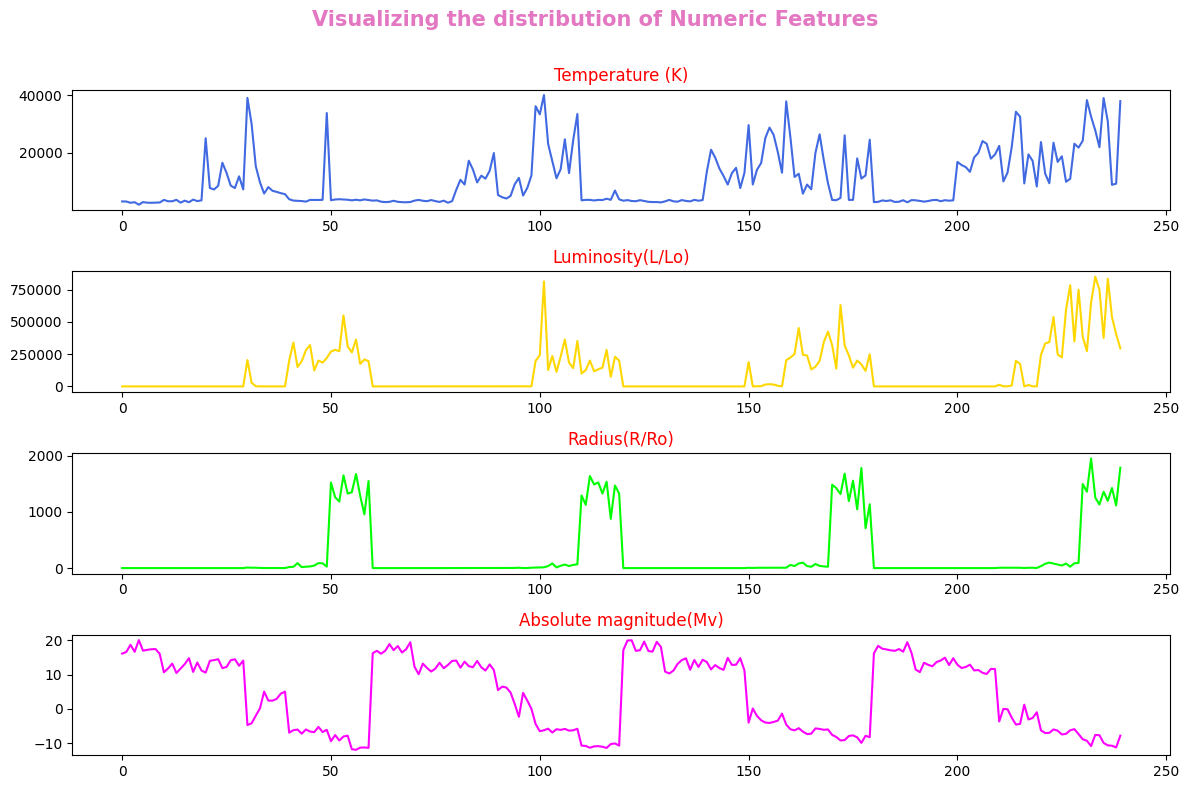

In [63]:
# Line Plots

# Colors to add in line plots
colors = ['royalblue', 'gold', 'lime', 'magenta']

# Add figure size and title to subplot
plt.figure(figsize=(12,8))
plt.suptitle('Visualizing the distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

# Use for loop and the function that creates subplot of line plots
for i in range(4):
  line_subplot(stars, colors, i)

# Use tight_layout() to automatically adjust the spacing in subplot
plt.tight_layout()

# Save the figure
plt.savefig(base_dir+'line_subplot.png')
plt.show()

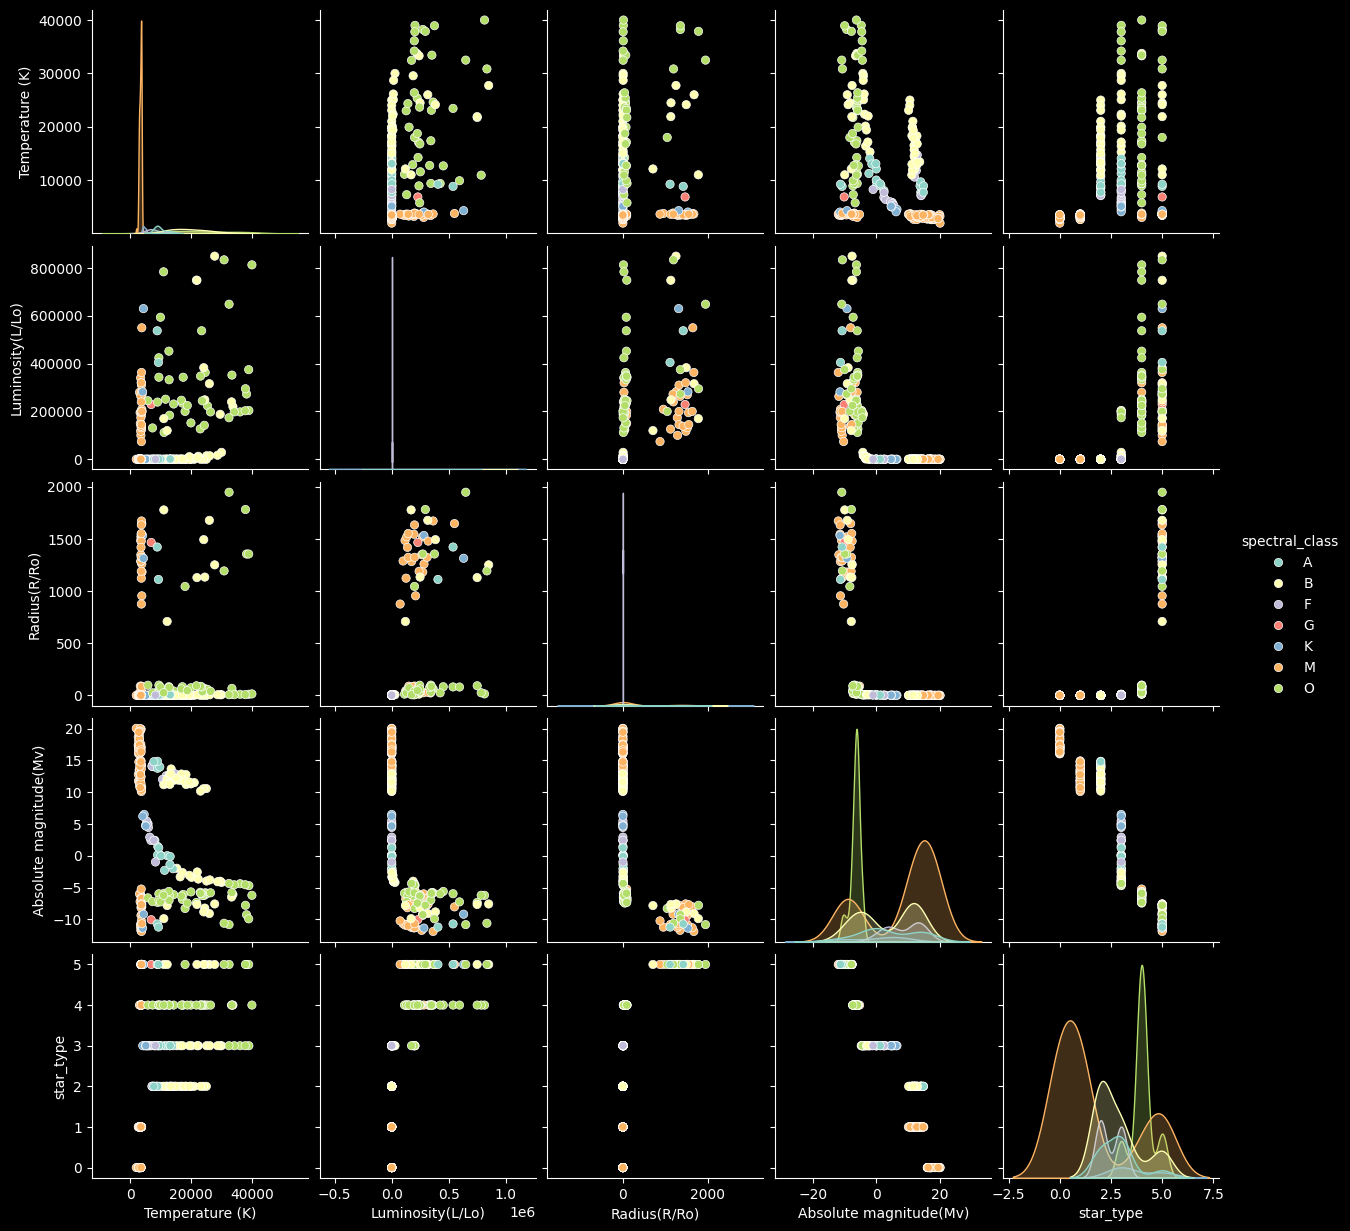

In [65]:
# Get a pairplot - scatter
plt.style.use('dark_background')
sns.pairplot(stars, hue='spectral_class')
plt.savefig(base_dir+'pairplot.png')
plt.show()


In [67]:
# Arrays to be used in the for loop
star_type = stars['star_type'].values
temperature = stars['Temperature (K)'].values
abs_mag = stars['Absolute magnitude(Mv)'].values

# Python dictionaries --> Made of key value pairs --> To be used to get properties of star_type
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

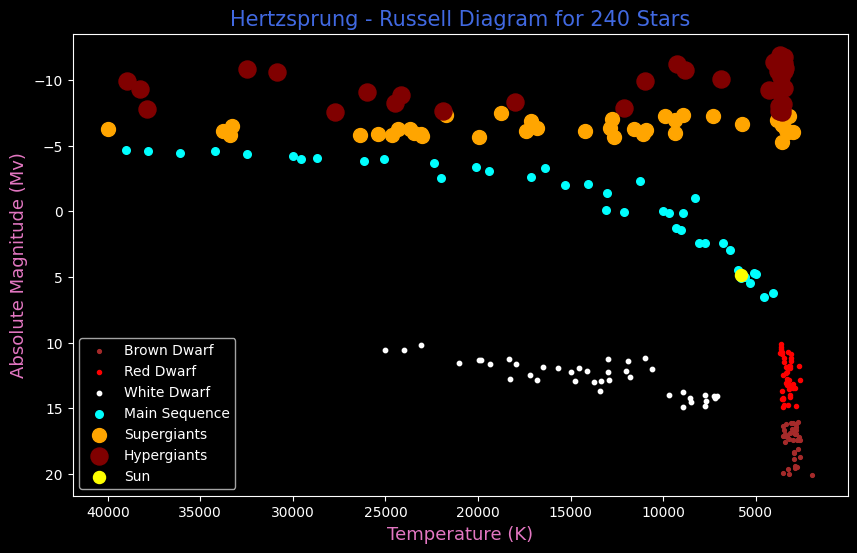

In [68]:
# Plotting a HR Diagram for Temp vs Abs mag

# Empty list and set to store ax and label of star_type
axes = []
labels = set()

plt.figure(figsize=(10, 6))

# For each and every star in the data
for i in range(len(star_type)):

  # Get its properties with its star_type from python dictonary
  properties = star_types[star_type[i]]

  # if label is not present in set labels
  if properties['label'] not in labels:
    # Then create the axis
    ax = plt.scatter(temperature[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])
    # Add it to axes list
    axes.append(ax)
    # Also add label to the labels set
    labels.add(properties['label'])
  # Else if the label already exist
  else:
    # Then don't save the axes nor add the label to labels set
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])

# Adding data for sun
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

# Add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')

# Add labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

# Visualize the labels only for the axes handles
plt.legend(handles=axes)

# Invert the axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Save Figure
plt.savefig(base_dir+'hr_diagram.png')
plt.show()

In [69]:
base_dir


'/gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/'

In [70]:
'''This shall work only in Google Colab'''
from google.colab import files                            # import files from colab module of google
!zip -r /content/star_plots.zip /gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/       # create a zip file of the folder in the same location where we created the base directory
files.download('/content/star_plots.zip')

  adding: gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/ (stored 0%)
  adding: gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/barplot_star_count.png (deflated 10%)
  adding: gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/star_colors_viz.png (deflated 10%)
  adding: gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/boxplot_star_type.png (deflated 19%)
  adding: gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/line_subplot.png (deflated 5%)
  adding: gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/pairplot.png (deflated 3%)
  adding: gdrive/MyDrive/Colab_Notebooks/Python_4_Astronomical_Analysis/star_plots/hr_diagram.png (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>